In [1]:
#Importing libraries
import pandas as pd
import numpy as np

In [2]:
food_df = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding='latin-1')
food_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


# QUESTION 11

2014 : 209460.54

2017 : 269617.53


In [3]:
food_df.groupby('Item')['Y2014'].sum()

Item
Alcohol, Non-Food        2403.00
Alcoholic Beverages    102410.11
Animal Products         11935.65
Animal fats            209460.54
Apples and products      9499.23
                         ...    
Vegetables, Other      155038.96
Vegetal Products       107145.19
Wheat and products     232670.13
Wine                     4497.36
Yams                   200396.96
Name: Y2014, Length: 119, dtype: float64

In [4]:
food_df.groupby('Item')['Y2017'].sum()

Item
Alcohol, Non-Food        2348.00
Alcoholic Beverages     95581.06
Animal Products         11547.65
Animal fats            269617.53
Apples and products     10198.90
                         ...    
Vegetables, Other      157752.59
Vegetal Products       107655.20
Wheat and products     240047.62
Wine                     4178.02
Yams                   229174.59
Name: Y2017, Length: 119, dtype: float64

In [5]:
food_df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

# Question 12

year 2015:

Mean = 135.236 
std = 1603.404

In [6]:
food_df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


# QUESTION 13

Total number: 1535
Percentage: 2.518747

In [7]:
missing_data = food_df.isnull().sum().sort_values(ascending=False)
percentage_missing_data = food_df.isnull().sum()/food_df.isnull().count().sort_values(ascending = False) * 100
missing_values = pd.concat([missing_data, percentage_missing_data], axis=1, keys=['missing_data', 'percentage'])
missing_values

,missing_data,percentage
Y2014,1589,2.607354
Y2015,1548,2.540078
Y2016,1535,2.518747
Y2017,1506,2.471162
Y2018,1436,2.356300
Unit,0,0.000000
Element,0,0.000000
Element Code,0,0.000000
Item,0,0.000000
Item Code,0,0.000000


# QUESTION 14


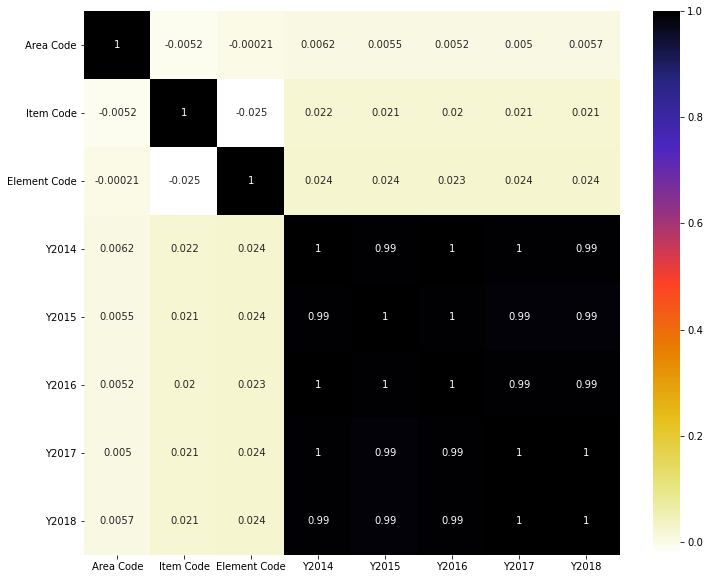

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = food_df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
correlation = food_df.corr()
correlation

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


# QUESTION 15

2014: Import Quantity                            274144.48

2015: Import Quantity                            267018.46

2016: Import Quantity                            286582.78

##### 2017: Import Quantity                            294559.09

2018: Import Quantity                            287997.09

In [10]:
food_df.groupby('Element')['Y2014'].sum()

Element
Domestic supply quantity                  1996716.35
Export Quantity                            150020.64
Fat supply quantity (g/capita/day)          10225.56
Feed                                       216927.89
Food                                      1212332.49
Food supply (kcal/capita/day)              454257.00
Food supply quantity (kg/capita/yr)         49650.63
Import Quantity                            274144.48
Losses                                     153223.00
Other uses (non-food)                       78718.13
Processing                                 282923.00
Production                                1931287.75
Protein supply quantity (g/capita/day)      11836.46
Residuals                                   30149.00
Seed                                        21922.92
Stock Variation                             58749.83
Total Population - Both sexes             1031585.00
Tourist consumption                           416.00
Name: Y2014, dtype: float64

In [11]:
food_df.groupby('Element')['Y2015'].sum()

Element
Domestic supply quantity                  2021493.55
Export Quantity                            157614.47
Fat supply quantity (g/capita/day)          10235.74
Feed                                       225050.22
Food                                      1232361.10
Food supply (kcal/capita/day)              453383.00
Food supply quantity (kg/capita/yr)         49345.13
Import Quantity                            267018.46
Losses                                     155439.00
Other uses (non-food)                       66254.41
Processing                                 287929.00
Production                                1947019.39
Protein supply quantity (g/capita/day)      11833.95
Residuals                                   30045.00
Seed                                        23976.82
Stock Variation                             34910.99
Total Population - Both sexes             1058081.00
Tourist consumption                           349.00
Name: Y2015, dtype: float64

In [12]:
food_df.groupby('Element')['Y2016'].sum()

Element
Domestic supply quantity                  2044842.70
Export Quantity                            151920.46
Fat supply quantity (g/capita/day)          10102.77
Feed                                       228958.65
Food                                      1247022.17
Food supply (kcal/capita/day)              451810.00
Food supply quantity (kg/capita/yr)         48985.28
Import Quantity                            286582.78
Losses                                     157787.00
Other uses (non-food)                       69563.68
Processing                                 280631.00
Production                                1943537.15
Protein supply quantity (g/capita/day)      11779.69
Residuals                                   37224.00
Seed                                        23389.20
Stock Variation                             33140.12
Total Population - Both sexes             1085107.00
Tourist consumption                            89.00
Name: Y2016, dtype: float64

In [13]:
food_df.groupby('Element')['Y2017'].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

In [14]:
food_df.groupby('Element')['Y2018'].sum()

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64

# Question 16

Production                                1931287.75

In [15]:
food_df.groupby('Element')['Y2014'].sum()

Element
Domestic supply quantity                  1996716.35
Export Quantity                            150020.64
Fat supply quantity (g/capita/day)          10225.56
Feed                                       216927.89
Food                                      1212332.49
Food supply (kcal/capita/day)              454257.00
Food supply quantity (kg/capita/yr)         49650.63
Import Quantity                            274144.48
Losses                                     153223.00
Other uses (non-food)                       78718.13
Processing                                 282923.00
Production                                1931287.75
Protein supply quantity (g/capita/day)      11836.46
Residuals                                   30149.00
Seed                                        21922.92
Stock Variation                             58749.83
Total Population - Both sexes             1031585.00
Tourist consumption                           416.00
Name: Y2014, dtype: float64

# QUESTION 17

Food supply quantity (kg/capita/yr)         49,056.85

Food supply (kcal/capita/day)              455,261.00

Domestic supply quantity                  2,161,192.10

Import Quantity                            287,997.09

In [16]:
food_df.groupby('Element')['Y2018'].sum()

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64

# QUESTION 18

5; Food supply (kcal/capita/day)              455,261.00

1; Fat supply quantity (g/capita/day)          10,258.69

2; Protein supply quantity (g/capita/day)      11,833.56

4; Food supply quantity (kg/capita/yr)         49,056.85

3; Seed                                        25,263.14


In [17]:
food_df.groupby('Element')['Y2018'].sum()

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64

# QUESTION 19

Import Quantity 36238.29


In [18]:
filt = food_df['Area'] == 'Algeria'
df=food_df.loc[filt]
df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,4,Algeria,2899,Miscellaneous,5142,Food,1000 tonnes,75.00,77.00,78.00,80.00,82.00
1309,4,Algeria,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,1.93,1.93,1.93,1.93,1.93
1310,4,Algeria,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,2.00,2.00,2.00,2.00,2.00
1311,4,Algeria,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.06,0.06,0.06,0.06,0.06


In [19]:
filt2 = df['Element'] == 'Import Quantity'
df2=df.loc[filt2]
df2

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
12,4,Algeria,2905,Cereals - Excluding Beer,5611,Import Quantity,1000 tonnes,12604.00,13983.00,13523.00,13039.00,13182.00
28,4,Algeria,2511,Wheat and products,5611,Import Quantity,1000 tonnes,7461.00,8531.00,8255.00,8105.00,8434.00
44,4,Algeria,2805,Rice and products,5611,Import Quantity,1000 tonnes,171.00,164.00,162.00,190.00,207.00
59,4,Algeria,2513,Barley and products,5611,Import Quantity,1000 tonnes,805.00,797.00,916.00,567.00,402.00
74,4,Algeria,2514,Maize and products,5611,Import Quantity,1000 tonnes,4148.00,4450.00,4159.00,4161.00,4126.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1265,4,Algeria,2769,"Aquatic Animals, Others",5611,Import Quantity,1000 tonnes,0.04,0.08,0.04,0.07,0.07
1274,4,Algeria,2775,Aquatic Plants,5611,Import Quantity,1000 tonnes,0.05,0.13,0.03,0.01,0.01
1283,4,Algeria,2928,Miscellaneous,5611,Import Quantity,1000 tonnes,121.00,126.00,121.00,113.00,80.00
1293,4,Algeria,2680,Infant food,5611,Import Quantity,1000 tonnes,23.00,27.00,24.00,18.00,24.00


In [20]:
df2['Y2018'].sum()

36238.29

# QUESTION 20

No.of.unique values : 49


In [21]:
food_df['Area'].value_counts()

Kenya                          1560
Egypt                          1488
Nigeria                        1474
Côte d'Ivoire                  1467
Senegal                        1462
Cameroon                       1460
Uganda                         1458
Zambia                         1451
Ethiopia                       1447
Malawi                         1447
Madagascar                     1439
Mozambique                     1427
Rwanda                         1426
Angola                         1424
United Republic of Tanzania    1419
Congo                          1413
Guinea                         1410
Burkina Faso                   1409
Niger                          1403
South Africa                   1399
Morocco                        1393
Zimbabwe                       1393
Botswana                       1378
Mauritius                      1378
Ghana                          1354
Central African Republic       1344
Chad                           1343
Tunisia                     

In [22]:
n = len(pd.unique(food_df['Area']))
print("No.of.unique values :", 
      n)

No.of.unique values : 49
